In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [3]:
pwd

'C:\\Users\\635718\\Desktop\\DataScience\\HackerEarth\\MLC4'

In [4]:
ghdfkghdfkjg

NameError: name 'ghdfkghdfkjg' is not defined

In [5]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [ ]:
id_test = test['connection_id'].values

In [ ]:
train.shape

In [ ]:
train.columns

In [ ]:
#train.nunique()

In [ ]:
train.head()

In [ ]:
#train[['cont_11','cont_12','cont_13','cont_17']]

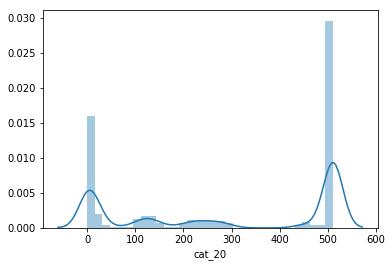

In [74]:
sns.distplot(train['cat_20'])

In [ ]:
train['target'].value_counts()

In [ ]:
sns.distplot(train['target'], kde=False)

In [ ]:
test.head()

In [ ]:
#test.nunique()

In [ ]:
sns.jointplot(x='cat_9',y='cat_22',data=train)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gb = RandomForestClassifier(n_estimators=200, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train.drop(['connection_id', 'target'],axis=1), train.target)
features = train.drop(['connection_id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [33]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))

In [34]:
print(gb.feature_importances_)
print(features)

[  2.89876251e-03   2.08228890e-02   1.81363525e-01   1.62736608e-03
   1.61785619e-03   4.03847526e-04   2.40545360e-04   1.98921169e-02
   1.58037060e-02   8.62628356e-03   6.62532594e-03   1.17691626e-02
   2.39422227e-02   6.01080215e-02   1.11604841e-03   2.15133048e-03
   5.34309309e-04   3.84006828e-04   2.50879784e-02   1.05279121e-01
   1.09180634e-02   0.00000000e+00   1.11049079e-07   0.00000000e+00
   6.72690791e-05   1.93966387e-06   1.00069467e-01   2.03316176e-04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   8.75666798e-06
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   2.82984776e-01   4.58295785e-02   5.92477393e-02
   1.03745583e-02]
['cont_1' 'cont_2' 'cont_3' 'cont_4' 'cont_5' 'cont_6' 'cont_7' 'cont_8'
 'cont_9' 'cont_10' 'cont_11' 'cont_12' 'cont_13' 'cont_14' 'cont_15'
 'cont_16' 'cont_17' 'cont_18' 'cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5'
 'cat_6' 'cat_7' 'cat_8' 'cat_9' 'cat_10' 'cat_11' 'cat_12' 'cat_13'
 'cat_14

In [35]:
feature_imp = pd.DataFrame(features)
feature_imp.columns = ['feature']
feature_imp['imp'] = gb.feature_importances_

In [43]:
list(feature_imp.sort_values(by='imp',ascending=False).head(30)['feature'])

['cat_20',
 'cont_3',
 'cat_2',
 'cat_9',
 'cont_14',
 'cat_22',
 'cat_21',
 'cat_1',
 'cont_13',
 'cont_2',
 'cont_8',
 'cont_9',
 'cont_12',
 'cat_3',
 'cat_23',
 'cont_10',
 'cont_11',
 'cont_1',
 'cont_16',
 'cont_4',
 'cont_5',
 'cont_15',
 'cont_17',
 'cont_6',
 'cont_18',
 'cont_7',
 'cat_10',
 'cat_7',
 'cat_14',
 'cat_8']

In [ ]:
import matplotlib.pyplot as plt

#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#sns.jointplot(x='feature',y='imp',data=feature_imp)

In [26]:
count_class_0, count_class_1, count_class_2 = train.target.value_counts()
print(max(count_class_0, count_class_1, count_class_2))

98868 49434 49434


In [27]:
#Resample the data
# Class count
count_class_0, count_class_1, count_class_2 = train.target.value_counts()

# Divide by class
df_class_0 = train[train['target'] == 0]
df_class_1 = train[train['target'] == 1]
df_class_2 = train[train['target'] == 2]

df_class_1_over = df_class_1.sample(int((count_class_0*2)/3), replace=True)
df_class_2_over = df_class_2.sample(int((count_class_0*2)/3), replace=True)

train_over = pd.concat([df_class_0, df_class_1_over, df_class_2_over], axis=0)

# Shuffle data
idx = np.arange(len(train_over))
np.random.shuffle(idx)
train_over = train_over.iloc[idx]

train = train_over

print(train.shape)

(230692, 43)


In [44]:
features = ['cat_20', 'cont_3', 'cat_2', 'cat_9', 'cont_14', 'cat_22', 'cat_21', 'cat_1', 'cont_13', 'cont_2', 
'cont_8', 'cont_9', 'cont_12', 'cat_3', 'cat_23', 'cont_10', 'cont_11', 'cont_1', 'cont_16', 'cont_4', 
'cont_5', 'cont_15', 'cont_17', 'cont_6', 'cont_18', 'cont_7', 'cat_10', 'cat_7', 'cat_14', 'cat_8']

In [ ]:
train_features = [x for x in features if x not in ['connection_id','target']]

X = train[train_features].values
y = train.loc[:,'target'].values
T = test[train_features].values

#create the models
# LightGBM params
lgb_params_1 = {
    'learning_rate': 0.01,
    'n_estimators': 1250,
    'max_bin': 10,
    'subsample': 0.8,
    'subsample_freq': 10,
    'colsample_bytree': 0.8, 
    'min_child_samples': 500
}

lgb_params_2 = {
    'learning_rate': 0.005,
    'n_estimators': 3700,
    'subsample': 0.7,
    'subsample_freq': 2,
    'colsample_bytree': 0.3,  
    'num_leaves': 16
}

lgb_params_3 = {
   'objective':'binary:logistic',
   'learning_rate':0.02,
    'n_estimators':1000,
    'max_depth':4,
    'subsample':0.9,
    'colsample_bytree':0.9,  
    'min_child_weight':10
}

lgb_model_1 = LGBMClassifier(**lgb_params_1)
lgb_model_2 = LGBMClassifier(**lgb_params_2)
lgb_model_3 = XGBClassifier(**lgb_params_3)
#base_models = (lgb_model_1, lgb_model_2, lgb_model_3)
base_models = (lgb_model_1, lgb_model_2)

log_model = LogisticRegression()
stacker = log_model
print("models created")

In [45]:
train_features = features
#train_features = [x for x in train.columns if x not in ['connection_id','target']]

X = train[train_features].values
y = train.loc[:,'target'].values
T = test[train_features].values

param_1 = {"n_estimators": 400,
            "max_depth": 1,
            "min_samples_split": 0.1,
            "min_samples_leaf": 1,
            "max_leaf_nodes": 2,
            "min_weight_fraction_leaf": 0.2
}

param_2 = {"n_estimators": 800,
            "max_depth": 5,
            "min_samples_split": 0.4,
            "min_samples_leaf": 4,
            "max_leaf_nodes": 10,
            "min_weight_fraction_leaf": 0.3
}

param_3 = {"n_estimators": 300,
            "max_depth": 7,
            "min_samples_split": 0.5,
            "min_samples_leaf": 10,
            "max_leaf_nodes": 7,
            "min_weight_fraction_leaf": 0.4
}

#clf1 = RandomForestClassifier(**param_1)
#clf2 = RandomForestClassifier(**param_2)
#clf3 = RandomForestClassifier(**param_3)

lgb_params_3 = {   
    'n_estimators':100
}

lgb_params_4 = {   
    'n_estimators':200
}

lgb_params_5 = {   
    'n_estimators':300
}

clf1 = XGBClassifier(**lgb_params_3)
clf2 = XGBClassifier(**lgb_params_4)
clf3 = XGBClassifier(**lgb_params_5)

base_models = (clf1, clf2, clf3)

print("models created")

models created


In [ ]:
#now we have the data with equal set of positives and negatives
#lets check cross validation scores
from scipy.stats import mode
n_splits=5
folds = list(StratifiedKFold(n_splits, shuffle=True, random_state=10).split(X, y))
S_train = np.zeros((X.shape[0], len(base_models)))
S_test = np.zeros((T.shape[0], len(base_models)))

for i, clf in enumerate(base_models):
    S_test_i = np.zeros((T.shape[0], n_splits))
    for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]
        print(X_train.shape)
        
        # Get positive examples
        """pos_1 = pd.Series(y_train == 1)
        pos_2 = pd.Series(y_train == 2)
        # Add positive examples - 1
        X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_train[pos_1])])
        y_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_train[pos_1])])
        # Add positive examples - 2
        X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_train[pos_2])])
        y_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_train[pos_2])])
        
        # Shuffle data
        idx = np.arange(len(X_train))
        np.random.shuffle(idx)
        X_train = X_train.iloc[idx]
        y_train = y_train.iloc[idx]"""

        print ("Fit %s fold %d" % (str(clf).split('(')[0], j+1))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_holdout)
        #y_pred = clf.predict_proba(X_holdout)[:,1]  
        
        S_train[test_idx, i] = y_pred
        S_test_i[:, j] = clf.predict(T)
        #S_test_i[:, j] = clf.predict_proba(T)[:,1]
    
    print(S_test_i)
    #print(mode(S_test_i, axis=1)[0].flatten())
    #print(S_test_i.mean(axis=1))
    S_test[:, i] = mode(S_test_i, axis=1)[0].flatten()
    #S_test[:, i] = S_test_i.mean(axis=1)
    #sns.distplot(S_test[:, i],kde=False)

[0]	train-merror:0.290442	test-merror:0.288905
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 50 rounds.
[5]	train-merror:0.289367	test-merror:0.287518
[10]	train-merror:0.289517	test-merror:0.287691
[15]	train-merror:0.289598	test-merror:0.287778
[20]	train-merror:0.289558	test-merror:0.287726
[25]	train-merror:0.28954	test-merror:0.287708
[30]	train-merror:0.289477	test-merror:0.287708
[35]	train-merror:0.289431	test-merror:0.287674
[40]	train-merror:0.289361	test-merror:0.287604
[45]	train-merror:0.28913	test-merror:0.287362
[50]	train-merror:0.288968	test-merror:0.287292
[55]	train-merror:0.288309	test-merror:0.286703
[60]	train-merror:0.288119	test-merror:0.286477
[65]	train-merror:0.287853	test-merror:0.286286
[70]	train-merror:0.287679	test-merror:0.286182
[75]	train-merror:0.287471	test-merror:0.285905
[80]	train-merror:0.287454	test-merror:0.285905
[85]	train-merror:0.287454	test-merror:0.

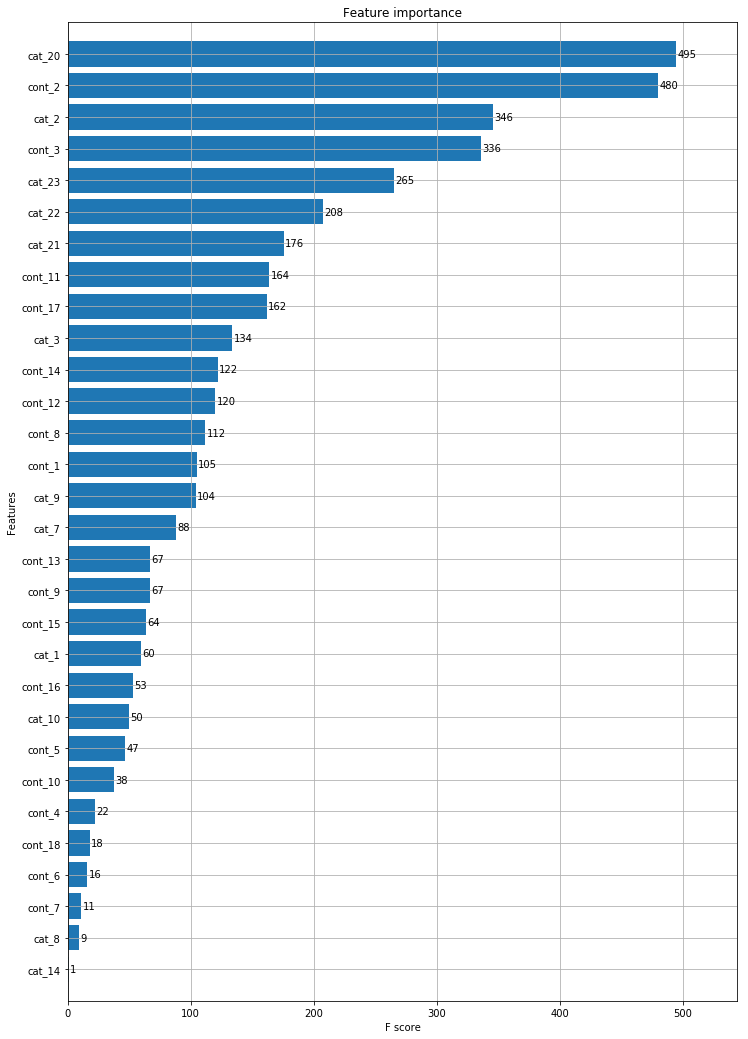

In [72]:
from sklearn.cross_validation import train_test_split
#XGB Param evaluation
xgb_params = {
    'n_estimators':200,
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'multi:softmax',
    'num_class': 3,
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.25, random_state = 0)

xgtrain = xgb.DMatrix(x_Train,y_Train, feature_names=features)
xgtest = xgb.DMatrix(x_Test,y_Test, feature_names=features)
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
num_rounds = 100 # Increase the number of rounds while running in local
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=5)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [61]:
"""rf_params = {
    'n_estimators':500,
    'max_depth':4,
    "min_samples_split": 6,
    "min_samples_leaf": 10,
    "max_leaf_nodes": 10,
    "min_weight_fraction_leaf": 0.3
}"""
from sklearn.model_selection import StratifiedKFold

stacker = RandomForestClassifier(n_estimators=200)
#stacker = XGBClassifier(objective='multi:softmax',num_class=3, n_estimators=200)

kfold = StratifiedKFold(n_splits=5, random_state=7)
#results = cross_val_score(stacker, S_train, y, cv=5,)
results = cross_val_score(stacker, X, y, cv=kfold)
print("Stacker score: %.5f" % (results.mean()))
print(results)

#print(stacker.best_params_)

#print("S train size is : ", S_train.shape)
stacker.fit(X, y)
res = stacker.predict(T)

print(res)

Stacker score: 0.75275
[ 0.75416125  0.751127    0.75317526  0.75425364  0.7510458 ]
[1 0 0 ..., 0 0 1]


In [ ]:
Random forest
without upsample
Stacker score: 0.76283
[ 0.76457386  0.76339259  0.76103006  0.76193851  0.76323095]
0    69275
1    18190
2     3701

total upsampling
Stacker score: 0.71665
[ 0.71474327  0.71614241  0.71725498  0.71949965  0.71562231]
[1 2 0 ..., 2 0 1]
0    51977
2    21005
1    18184

n_estimator = 200
0    52059
2    20923
1    18184

proportional upsample
Stacker score: 0.76315 -- half upsample
[ 0.76385658  0.76170729  0.76416001  0.76410347  0.76194209]
[1 0 0 ..., 0 0 1]
0    68884
1    18184
2     4098

Stacker score: 0.76333 -- 2/3 upsample
[ 0.76438758  0.76137858  0.76393244  0.7646092   0.76234669]
[1 0 0 ..., 0 0 1]
0    68865
1    18181
2     4120

features = ['cat_20', 'cont_3', 'cat_2', 'cat_9', 'cont_14', 'cat_22', 'cat_21', 'cat_1', 'cont_13', 'cont_2', 
'cont_8', 'cont_9', 'cont_12', 'cat_3', 'cat_23', 'cont_10', 'cont_11', 'cont_1', 'cont_16', 'cont_4', 
'cont_5', 'cont_15', 'cont_17', 'cont_6', 'cont_18', 'cont_7', 'cat_10', 'cat_7', 'cat_14', 'cat_8']

Stacker score: 0.75308 -- 2/3 upsample -- selected features
[ 0.75435631  0.75175553  0.75334865  0.75457875  0.75137092]
[1 0 0 ..., 0 0 1]
0    68624
1    18185
2     4357

Stratified
Stacker score: 0.75275
[ 0.75416125  0.751127    0.75317526  0.75425364  0.7510458 ]
[1 0 0 ..., 0 0 1]
0    68604
1    18183
2     4379

In [ ]:
XGBoost
without upsample
Stacker score: 0.78073 -- Not predicting 2 at all
[ 0.78096391  0.78102298  0.78040281  0.78075072  0.78050797]
0    72936
1    18214
2       16

total upsampling
Stacker score: 0.66660
[ 0.66422238  0.66656552  0.66789724  0.66708812  0.66722298]
0    67147
1    18319
2     5700

features = ['cat_20', 'cont_3', 'cat_2', 'cat_9', 'cont_14', 'cat_22', 'cat_21', 'cat_1', 'cont_13', 'cont_2', 
'cont_8', 'cont_9', 'cont_12', 'cat_3', 'cat_23', 'cont_10', 'cont_11', 'cont_1', 'cont_16', 'cont_4', 
'cont_5', 'cont_15', 'cont_17', 'cont_6', 'cont_18', 'cont_7', 'cat_10', 'cat_7', 'cat_14', 'cat_8']

Stacker score: 0.71374 -- 2/3 upsample -- selected features
[ 0.71352406  0.71391417  0.7137934   0.71389557  0.71354878]
[1 0 0 ..., 0 0 1]
0    72850
1    18226
2       90

objective='multi:softmax', StratifiedKFold
Stacker score: 0.71374
[ 0.71352406  0.71391417  0.7137934   0.71389557  0.71354878]
[1 0 0 ..., 0 0 1]
0    72850
1    18226
2       90


In [ ]:
print(len(res))
print(len(id_test))

In [62]:
r = pd.DataFrame(res)

In [63]:
r.columns = ['tar']

In [64]:
r['tar'].value_counts()

0    68604
1    18183
2     4379
Name: tar, dtype: int64

In [ ]:
sns.distplot(res,kde=False)

In [ ]:
print(results)
print(res)

sub = pd.DataFrame()
sub['id'] = id_test
sub['target'] = res
sub.to_csv('stacked_result_strat_upsample.csv', index=False)

print('completed')